# Coursera Capstone Data Science Project

### This notebook is for the IBM Data Science Professional Course's final Capstone Project

In [299]:
import pandas as pd,numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Reading the file

In [243]:
df_acc = pd.read_csv("Data-Collisions.csv",encoding="ISO-8859-1")

In [244]:
df_acc.head()

,ï»¿SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [245]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [246]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

## Cleaning the Data

In [247]:
df_acc.shape

(194673, 38)

In [248]:
# Percentage of Missing values from each column
round((df_acc.isnull().sum()/len(df_acc.index))*100,2)

ï»¿SEVERITYCODE     0.00
X                   2.74
Y                   2.74
OBJECTID            0.00
INCKEY              0.00
COLDETKEY           0.00
REPORTNO            0.00
STATUS              0.00
ADDRTYPE            0.99
INTKEY             66.57
LOCATION            1.38
EXCEPTRSNCODE      56.43
EXCEPTRSNDESC      97.10
SEVERITYCODE        0.00
SEVERITYDESC        0.00
COLLISIONTYPE       2.52
PERSONCOUNT         0.00
PEDCOUNT            0.00
PEDCYLCOUNT         0.00
VEHCOUNT            0.00
INCDATE             0.00
INCDTTM             0.00
JUNCTIONTYPE        3.25
SDOT_COLCODE        0.00
SDOT_COLDESC        0.00
INATTENTIONIND     84.69
UNDERINFL           2.51
WEATHER             2.61
ROADCOND            2.57
LIGHTCOND           2.66
PEDROWNOTGRNT      97.60
SDOTCOLNUM         40.96
SPEEDING           95.21
ST_COLCODE          0.01
ST_COLDESC          2.52
SEGLANEKEY          0.00
CROSSWALKKEY        0.00
HITPARKEDCAR        0.00
dtype: float64

In [249]:
#Dropping the columns with more than 50% Missing Values
df_acc.drop(['SPEEDING','PEDROWNOTGRNT','INATTENTIONIND','EXCEPTRSNDESC','INTKEY','EXCEPTRSNCODE','ï»¿SEVERITYCODE'],axis=1,inplace=True)

In [250]:
# Getting rid of the rows with null value columns of lesser than 5% 
df_acc = df_acc.loc[pd.notnull(df_acc['ST_COLCODE'])]
df_acc = df_acc.loc[pd.notnull(df_acc['X'])]
df_acc = df_acc.loc[pd.notnull(df_acc['Y'])]
df_acc = df_acc.loc[pd.notnull(df_acc['ST_COLDESC'])]
df_acc = df_acc.loc[pd.notnull(df_acc['ADDRTYPE'])]
df_acc = df_acc.loc[pd.notnull(df_acc['LIGHTCOND'])]
df_acc = df_acc.loc[pd.notnull(df_acc['ROADCOND'])]
df_acc = df_acc.loc[pd.notnull(df_acc['WEATHER'])]
df_acc = df_acc.loc[pd.notnull(df_acc['UNDERINFL'])]
df_acc = df_acc.loc[pd.notnull(df_acc['COLLISIONTYPE'])]
df_acc = df_acc.loc[pd.notnull(df_acc['JUNCTIONTYPE'])]

In [251]:
round((df_acc.isnull().sum()/len(df_acc.index))*100,2)

X                 0.00
Y                 0.00
OBJECTID          0.00
INCKEY            0.00
COLDETKEY         0.00
REPORTNO          0.00
STATUS            0.00
ADDRTYPE          0.00
LOCATION          0.00
SEVERITYCODE      0.00
SEVERITYDESC      0.00
COLLISIONTYPE     0.00
PERSONCOUNT       0.00
PEDCOUNT          0.00
PEDCYLCOUNT       0.00
VEHCOUNT          0.00
INCDATE           0.00
INCDTTM           0.00
JUNCTIONTYPE      0.00
SDOT_COLCODE      0.00
SDOT_COLDESC      0.00
UNDERINFL         0.00
WEATHER           0.00
ROADCOND          0.00
LIGHTCOND         0.00
SDOTCOLNUM       39.23
ST_COLCODE        0.00
ST_COLDESC        0.00
SEGLANEKEY        0.00
CROSSWALKKEY      0.00
HITPARKEDCAR      0.00
dtype: float64

In [252]:
# Deleting redundant/non-critical columns
df_acc.drop(['LOCATION','OBJECTID','INCKEY','COLDETKEY','REPORTNO','SEVERITYDESC','INCDATE','SDOT_COLCODE','SDOTCOLNUM','ST_COLCODE'],axis=1,inplace=True)

In [253]:
# Dropping the X and Y coordinate columns
df_acc.drop(['X','Y'],axis=1,inplace=True)

In [254]:
# Deleting columns having one dominant category(more than 90%)
df_acc.drop(['SEGLANEKEY','CROSSWALKKEY','STATUS'],axis=1,inplace=True)

In [255]:
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180067 entries, 0 to 194672
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ADDRTYPE       180067 non-null  object
 1   SEVERITYCODE   180067 non-null  int64 
 2   COLLISIONTYPE  180067 non-null  object
 3   PERSONCOUNT    180067 non-null  int64 
 4   PEDCOUNT       180067 non-null  int64 
 5   PEDCYLCOUNT    180067 non-null  int64 
 6   VEHCOUNT       180067 non-null  int64 
 7   INCDTTM        180067 non-null  object
 8   JUNCTIONTYPE   180067 non-null  object
 9   SDOT_COLDESC   180067 non-null  object
 10  UNDERINFL      180067 non-null  object
 11  WEATHER        180067 non-null  object
 12  ROADCOND       180067 non-null  object
 13  LIGHTCOND      180067 non-null  object
 14  ST_COLDESC     180067 non-null  object
 15  HITPARKEDCAR   180067 non-null  object
dtypes: int64(5), object(11)
memory usage: 23.4+ MB


In [256]:
# Dealing with the DateTIme variable
df_acc['INCDTTM'] = pd.to_datetime(df_acc['INCDTTM'])

## Feature Engineering

In [257]:
df_acc['DayofWeek'] = df_acc['INCDTTM'].dt.dayofweek
df_acc['Month'] = df_acc['INCDTTM'].dt.month
df_acc['Hour'] = df_acc['INCDTTM'].dt.hour

In [258]:
# Dropping the original datetime column
df_acc.drop('INCDTTM',axis=1,inplace=True)

In [259]:
df_acc.head()

,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLDESC,HITPARKEDCAR,DayofWeek,Month,Hour
0,Intersection,2,Angles,2,0,0,2,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,Wet,Daylight,Entering at angle,N,2,3,14
1,Block,1,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,Raining,Wet,Dark - Street Lights On,From same direction - both going straight - bo...,N,2,12,18
2,Block,1,Parked Car,4,0,0,3,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Overcast,Dry,Daylight,One parked--one moving,N,3,11,10
3,Block,1,Other,3,0,0,3,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,From same direction - all others,N,4,3,9
4,Intersection,2,Angles,2,0,0,2,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight,Entering at angle,N,2,1,8


## Exploratory Data Analysis

In [260]:
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180067 entries, 0 to 194672
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ADDRTYPE       180067 non-null  object
 1   SEVERITYCODE   180067 non-null  int64 
 2   COLLISIONTYPE  180067 non-null  object
 3   PERSONCOUNT    180067 non-null  int64 
 4   PEDCOUNT       180067 non-null  int64 
 5   PEDCYLCOUNT    180067 non-null  int64 
 6   VEHCOUNT       180067 non-null  int64 
 7   JUNCTIONTYPE   180067 non-null  object
 8   SDOT_COLDESC   180067 non-null  object
 9   UNDERINFL      180067 non-null  object
 10  WEATHER        180067 non-null  object
 11  ROADCOND       180067 non-null  object
 12  LIGHTCOND      180067 non-null  object
 13  ST_COLDESC     180067 non-null  object
 14  HITPARKEDCAR   180067 non-null  object
 15  DayofWeek      180067 non-null  int64 
 16  Month          180067 non-null  int64 
 17  Hour           180067 non-null  int64 
dtypes: i

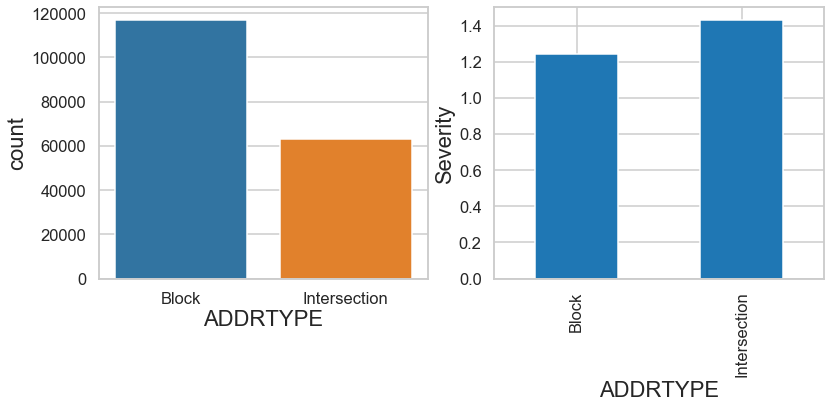

In [261]:
plt.figure(figsize = [13,5])
plt.subplot(1,2,1)
sns.countplot(x = 'ADDRTYPE', order = df_acc['ADDRTYPE'].value_counts().index, data=df_acc)
plt.subplot(1,2,2)
ax = df_acc.groupby('ADDRTYPE')['SEVERITYCODE'].mean().plot.bar()
ax.set_ylabel("Severity")
plt.show()

The above two graphs show that even there are lesser accidents/collisions on the intersections, they are more severe.

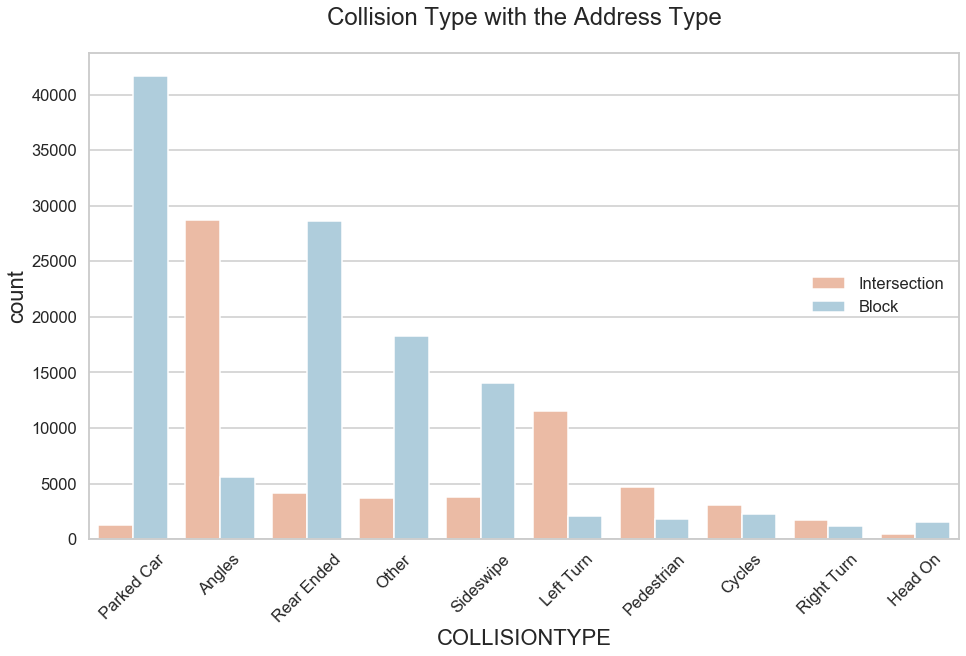

In [262]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.rcParams["axes.labelsize"] = 22
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.titlepad'] = 28    
temp = pd.Series(data = 'ADDRTYPE')
fig, ax = plt.subplots()
fig.subplots_adjust(top=0.8,right=0.7)
width = len(df_acc['COLLISIONTYPE'].unique()) + 8 + 3*len(temp.unique())
fig.set_size_inches(width , 10)
plt.xticks(rotation=45)
plt.title("Collision Type with the Address Type")
ax = sns.countplot(data = df_acc, x = 'COLLISIONTYPE', order=df_acc['COLLISIONTYPE'].value_counts().index,hue = 'ADDRTYPE',palette='RdBu')
ax.legend(loc='right', frameon=False)
plt.show()

Above are the different Collision types for both types of Address types. **Angles** seem to be most frequent Collision type for Intersection.

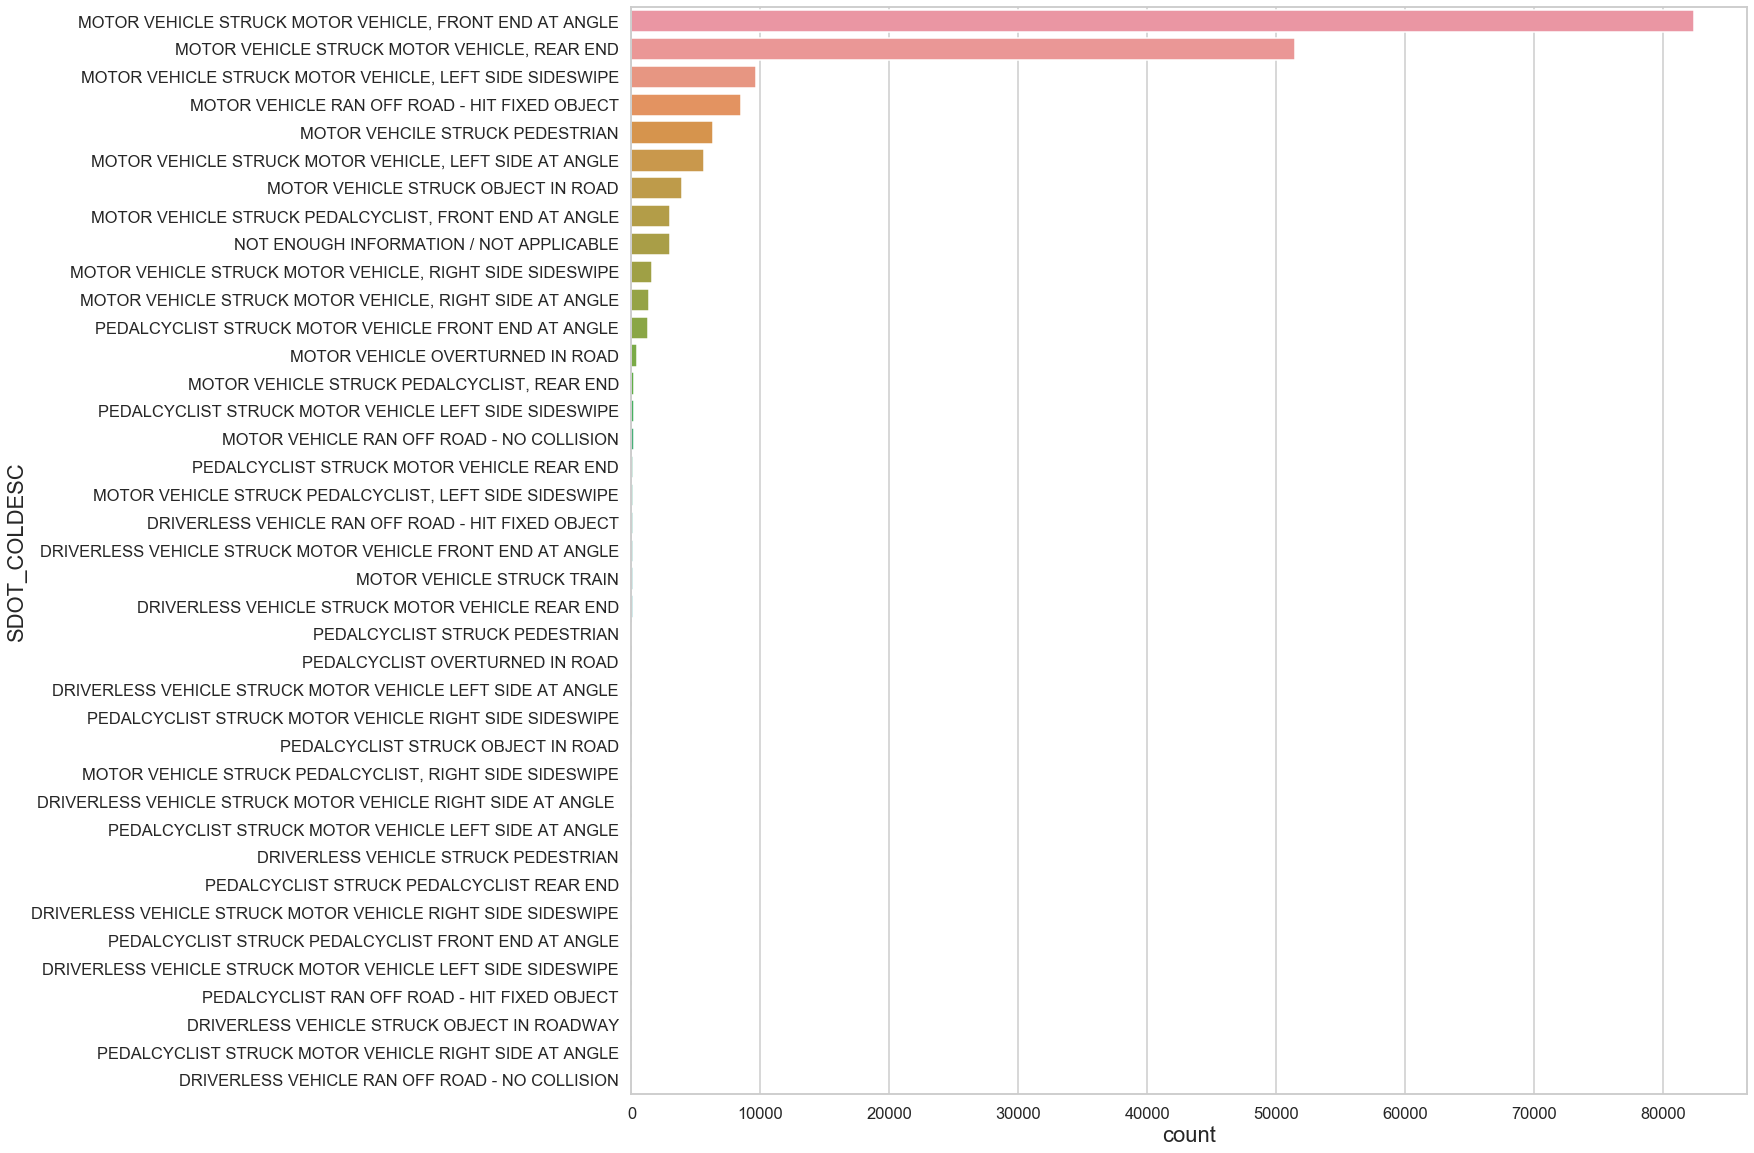

In [263]:
plt.figure(figsize = [20,20])
sns.countplot(y = 'SDOT_COLDESC', order = df_acc['SDOT_COLDESC'].value_counts().index, data = df_acc)
plt.show()

In [264]:
# Dropping the above column as it is redundant with the ST_COLDESC column
df_acc.drop('SDOT_COLDESC',axis=1,inplace=True)

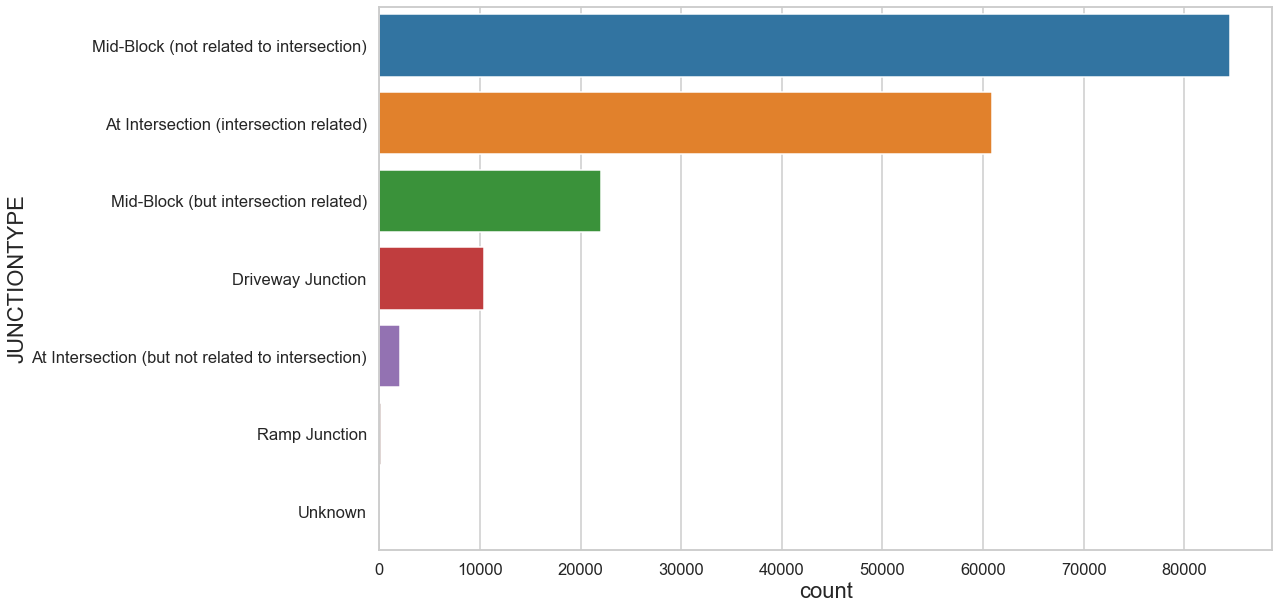

In [265]:
plt.figure(figsize = [16,10])
sns.countplot(y = 'JUNCTIONTYPE', order = df_acc['JUNCTIONTYPE'].value_counts().index, data = df_acc)
plt.show()

In [266]:
df_acc['UNDERINFL'].value_counts()

N    93736
0    77514
Y     4939
1     3878
Name: UNDERINFL, dtype: int64

In [267]:
df_acc['UNDERINFL'] = df_acc['UNDERINFL'].replace('N','0')
df_acc['UNDERINFL'] = df_acc['UNDERINFL'].replace('Y','1')

In [268]:
df_acc['UNDERINFL'] = df_acc['UNDERINFL'].astype(int)

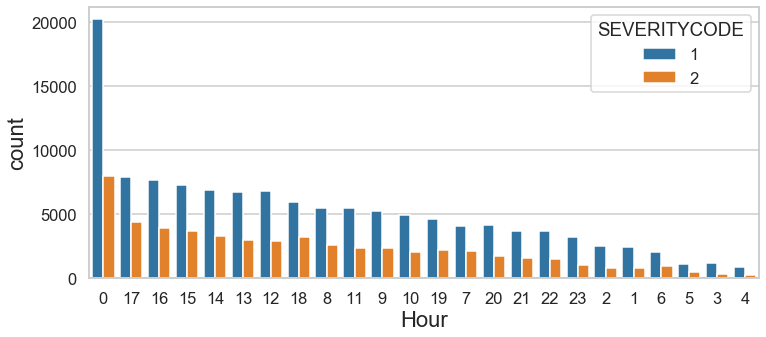

In [269]:
plt.figure(figsize = [12,5])
sns.countplot(x = 'Hour', order = df_acc['Hour'].value_counts().index, hue = 'SEVERITYCODE', data = df_acc)
plt.show()

In [270]:
# Droping the Hour column as most of values were not present in the data and a disproportionate number of 0's will wrongly influence the model
df_acc.drop('Hour',axis=1,inplace=True)

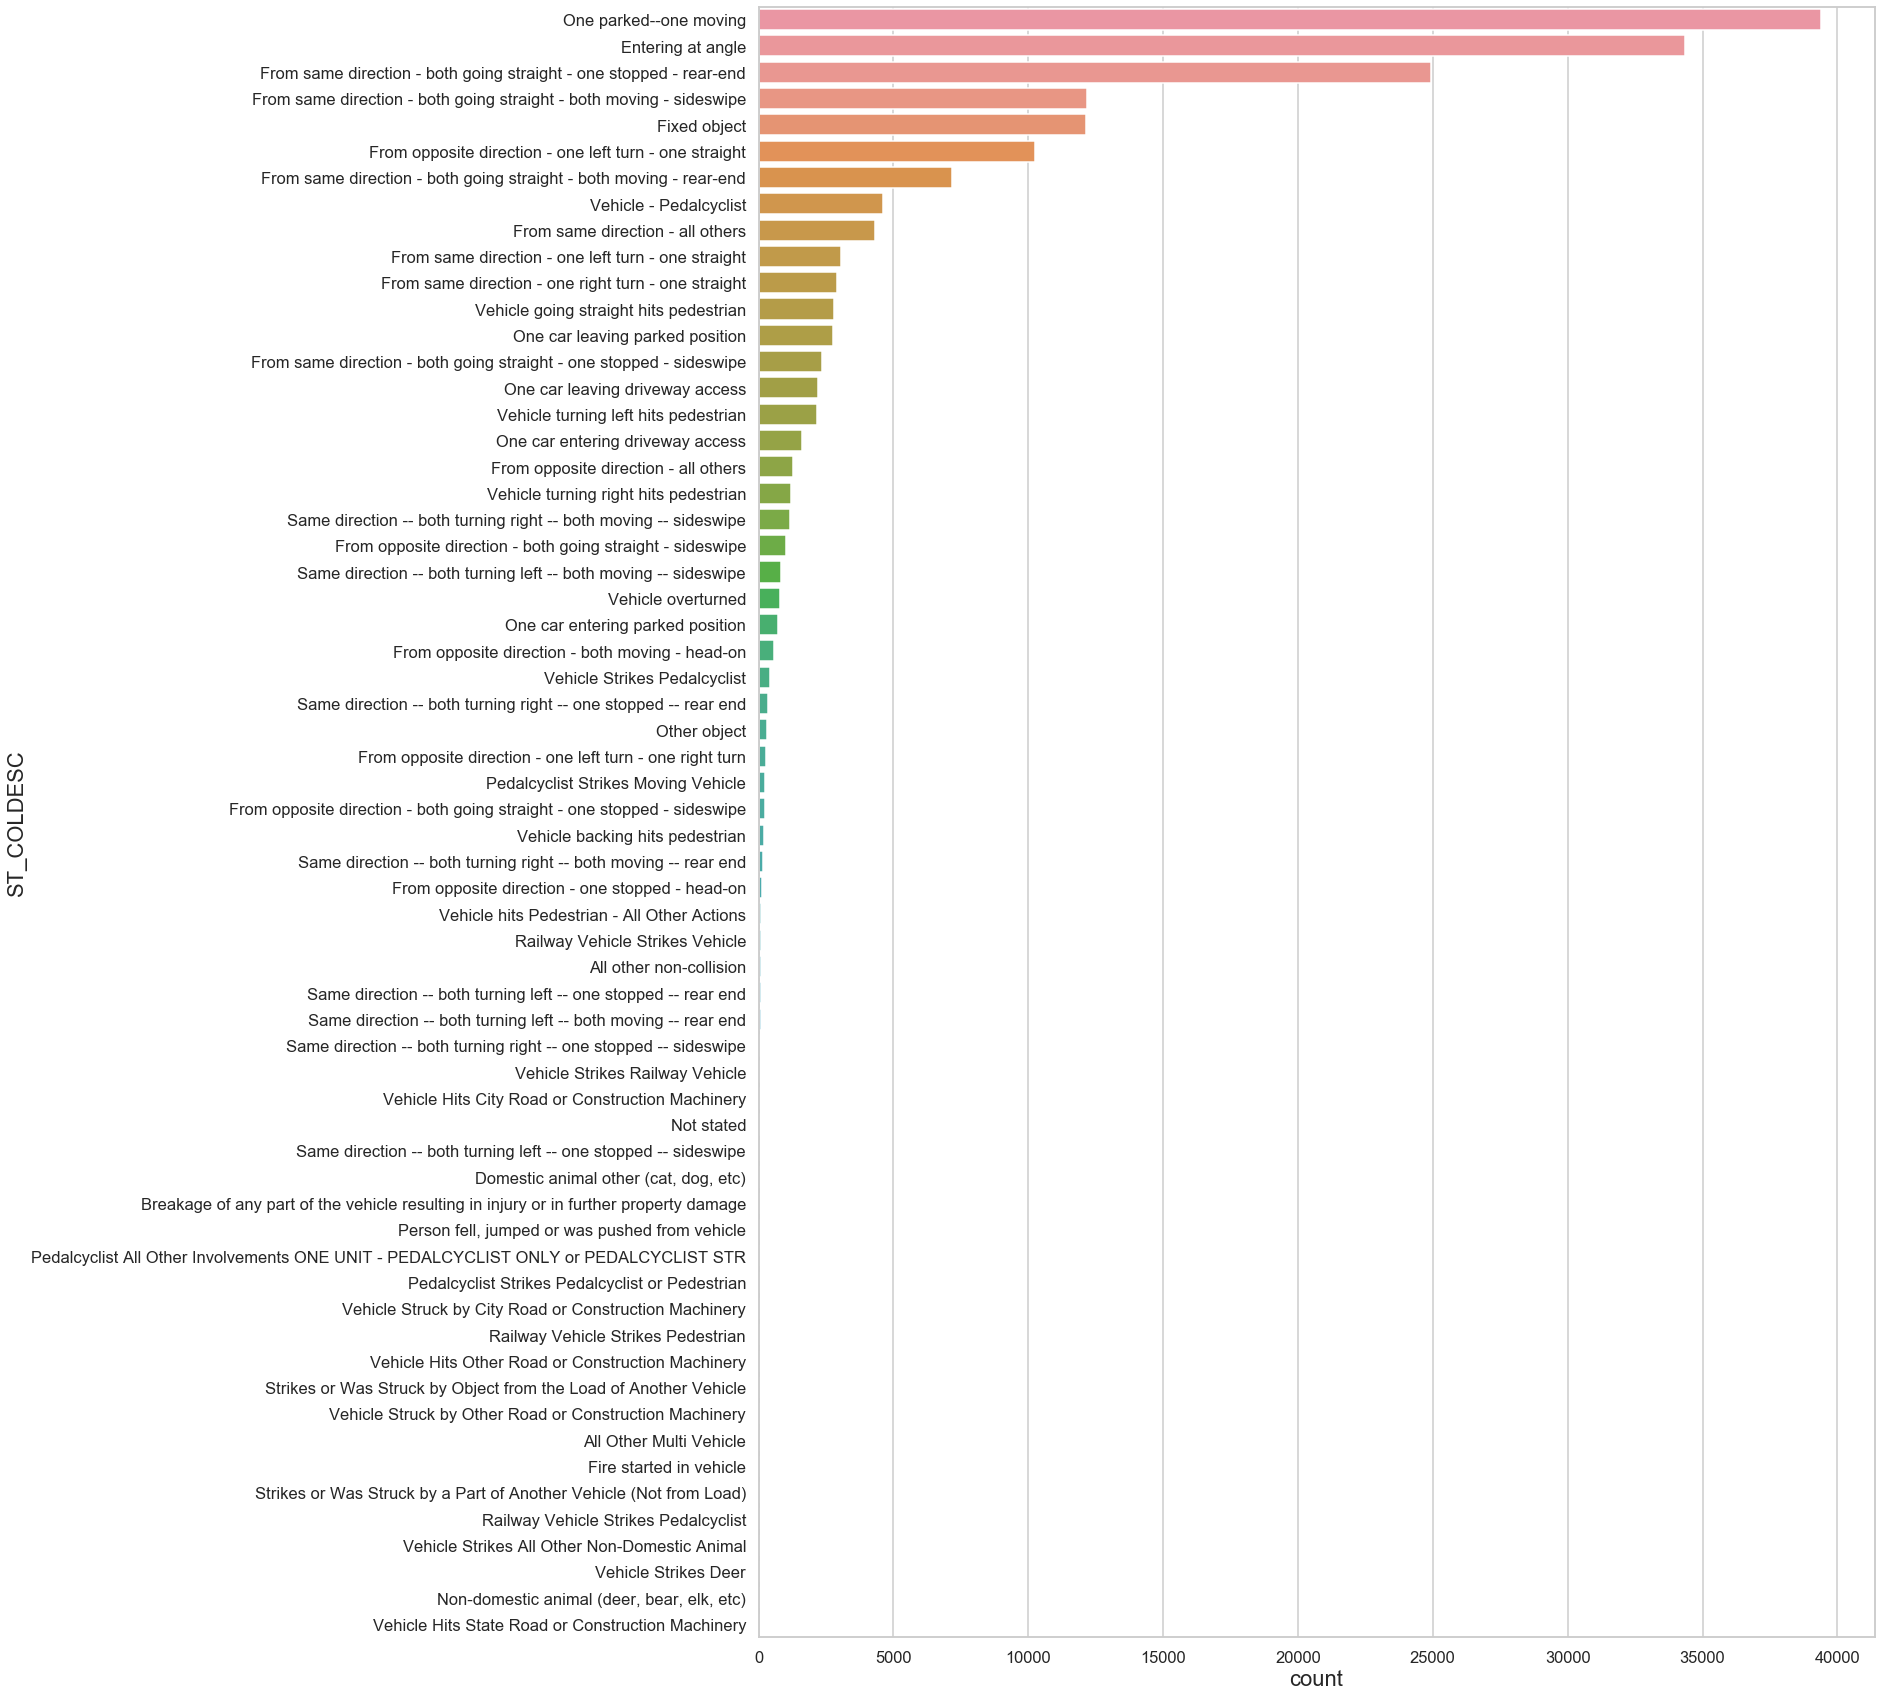

In [271]:
plt.figure(figsize = [20,30])
sns.countplot(y = 'ST_COLDESC', order = df_acc['ST_COLDESC'].value_counts().index, data = df_acc)
plt.show()

In [272]:
# Lumping the above column into fewer, homogenous values
df_acc['ST_COLDESC'] = df_acc['ST_COLDESC'].replace(["From same direction - both going straight - one stopped - rear-end",
                                                        "Same direction -- both turning right -- one stopped -- sideswipe",
                                                         "From same direction - both going straight - both moving - rear-end",
                                                         "From same direction - both going straight - one stopped - sideswipe"],
                                                       "Same Direction - Straight")

In [273]:
df_acc['ST_COLDESC'] = df_acc['ST_COLDESC'].replace(["Same direction -- both turning right -- one stopped -- rear end",
                                                        "Same direction -- both turning right -- one stopped -- sideswipe",
                                                         "Same direction -- both turning right -- both moving -- rear end",
                                                         "Same direction -- both turning right -- both moving -- sideswipe"],
                                                       "Same Direction - Turning right")

In [274]:
df_acc['ST_COLDESC'] = df_acc['ST_COLDESC'].replace(["Same direction -- both turning left -- one stopped -- sideswipe",
                                                        "Same direction -- both turning left -- one stopped -- rear end",
                                                         "Same direction -- both turning left -- both moving -- rear end",
                                                         "Same direction -- both turning left -- both moving -- sideswipe"],
                                                       "Same Direction - Turning left")

In [275]:
df_acc['ST_COLDESC'] = df_acc['ST_COLDESC'].replace(["From same direction - all others",
                                                        "From same direction - one left turn - one straight",
                                                         "From same direction - one right turn - one straight"],
                                                       "Same Direction - Others")

In [276]:
df_acc['ST_COLDESC'] = df_acc['ST_COLDESC'].replace(["From opposite direction - one left turn - one straight",
                                                     "From opposite direction - one left turn - one right turn",
                                                     "From opposite direction - one stopped - head-on",
                                                     "From opposite direction - both going straight - one stopped - sideswipe",
                                                     "From opposite direction - both moving - head-on",
                                                     "From opposite direction - both going straight - sideswipe",
                                                     "From opposite direction - all others"],
                                                       "Opposite Direction")

In [277]:
df_acc['ST_COLDESC'] = df_acc['ST_COLDESC'].replace(["Vehicle going straight hits pedestrian",
                                                     "Vehicle turning left hits pedestrian",
                                                     "Vehicle turning right hits pedestrian",
                                                     "Vehicle Strikes Pedalcyclist",
                                                     "Pedalcyclist Strikes Moving Vehicle",
                                                     "Vehicle hits Pedestrian - All Other Actions",
                                                     "Vehicle - Pedalcyclist",
                                                     "Vehicle backing hits pedestrian"],
                                                       "Vehicle - Pedestrian")

In [278]:
df_acc['ST_COLDESC'] = df_acc['ST_COLDESC'].replace(["One car leaving parked position",
                                                     "One car leaving driveway access",
                                                     "One car entering driveway access",
                                                     "One car entering parked position",
                                                     "Vehicle Hits State Road or Construction Machinery",
                                                     "Vehicle Struck by Other Road or Construction Machinery",
                                                     "Vehicle Hits Other Road or Construction Machinery",
                                                     "Vehicle Struck by City Road or Construction Machinery",
                                                     "Vehicle Hits City Road or Construction Machinery",
                                                     "Fire started in vehicle",
                                                     "All Other Multi Vehicle",
                                                     "Strikes or Was Struck by Object from the Load of Another Vehicle",
                                                     "Breakage of any part of the vehicle resulting in injury or in further property damage",
                                                     "Vehicle overturned"],
                                                       "One Car")

In [279]:
df_acc['ST_COLDESC'] = df_acc['ST_COLDESC'].replace(["Fixed Object",
                                                     "Other object"],
                                                       "Object")

In [280]:
df_acc['ST_COLDESC'] = df_acc['ST_COLDESC'].replace(["Railway Vehicle Strikes Vehicle", 
                                                     "All other non-collision",
                                                     "Vehicle Strikes Railway Vehicle",
                                                     "Not stated", 
                                                     "Domestic animal other (cat, dog, etc)",
                                                     "Person fell, jumped or was pushed from vehicle",
                                                     "Pedalcyclist All Other Involvements ONE UNIT - PEDALCYCLIST ONLY or PEDALCYCLIST STR",
                                                     "Pedalcyclist Strikes Pedalcyclist or Pedestrian",
                                                     "Railway Vehicle Strikes Pedestrian",
                                                     "Strikes or Was Struck by a Part of Another Vehicle (Not from Load)",
                                                     "Vehicle Strikes All Other Non-Domestic Animal",
                                                     "Railway Vehicle Strikes Pedalcyclist",
                                                     "Vehicle Strikes Deer",
                                                     "Non-domestic animal (deer, bear, elk, etc)"],
                                                       "All Others")

In [281]:
df_acc['ST_COLDESC'].value_counts()

One parked--one moving                                                 39408
Same Direction - Straight                                              34540
Entering at angle                                                      34353
Opposite Direction                                                     13740
From same direction - both going straight - both moving - sideswipe    12178
Fixed object                                                           12157
Vehicle - Pedestrian                                                   11774
Same Direction - Others                                                10283
One Car                                                                 8204
Same Direction - Turning right                                          1658
Same Direction - Turning left                                           1030
All Others                                                               413
Object                                                                   329

In [282]:
df_acc['HITPARKEDCAR'].value_counts()

N    174386
Y      5681
Name: HITPARKEDCAR, dtype: int64

In [283]:
# Highly disproportionate
df_acc.drop('HITPARKEDCAR',axis=1,inplace = True)

## Data Preprocessing

In [284]:
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180067 entries, 0 to 194672
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ADDRTYPE       180067 non-null  object
 1   SEVERITYCODE   180067 non-null  int64 
 2   COLLISIONTYPE  180067 non-null  object
 3   PERSONCOUNT    180067 non-null  int64 
 4   PEDCOUNT       180067 non-null  int64 
 5   PEDCYLCOUNT    180067 non-null  int64 
 6   VEHCOUNT       180067 non-null  int64 
 7   JUNCTIONTYPE   180067 non-null  object
 8   UNDERINFL      180067 non-null  int32 
 9   WEATHER        180067 non-null  object
 10  ROADCOND       180067 non-null  object
 11  LIGHTCOND      180067 non-null  object
 12  ST_COLDESC     180067 non-null  object
 13  DayofWeek      180067 non-null  int64 
 14  Month          180067 non-null  int64 
dtypes: int32(1), int64(7), object(7)
memory usage: 26.3+ MB


In [285]:
# Handling Categorical Variables
df1 = pd.get_dummies(df_acc['ADDRTYPE'],prefix='ADDR')
df2 = pd.get_dummies(df_acc['COLLISIONTYPE'],prefix='COLLISIONTYPE')
df3 = pd.get_dummies(df_acc['JUNCTIONTYPE'],prefix='JUNCTIONTYPE')
df4 = pd.get_dummies(df_acc['WEATHER'],prefix='WEATHER')
df5 = pd.get_dummies(df_acc['ROADCOND'],prefix='ROADCOND')
df6 = pd.get_dummies(df_acc['LIGHTCOND'],prefix='LIGHTCOND')
df7 = pd.get_dummies(df_acc['ST_COLDESC'],prefix='ST_COLDESC')

In [286]:
df1 = pd.concat([df_acc,df1],axis=1)
df2 = pd.concat([df1,df2],axis=1)
df3 = pd.concat([df2,df3],axis=1)
df4 = pd.concat([df3,df4],axis=1)
df5 = pd.concat([df4,df5],axis=1)
df6 = pd.concat([df5,df6],axis=1)
df_final = pd.concat([df6,df7],axis=1)

In [287]:
df_final.head()

,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLDESC,DayofWeek,Month,ADDR_Block,ADDR_Intersection,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,WEATHER_Unknown,ROADCOND_Dry,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Other,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Unknown,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown,ST_COLDESC_All Others,ST_COLDESC_Entering at angle,ST_COLDESC_Fixed object,ST_COLDESC_From same direction - both going straight - both moving - sideswipe,ST_COLDESC_Object,ST_COLDESC_One Car,ST_COLDESC_One parked--one moving,ST_COLDESC_Opposite Direction,ST_COLDESC_Same Direction - Others,ST_COLDESC_Same Direction - Straight,ST_COLDESC_Same Direction - Turning left,ST_COLDESC_Same Direction - Turning right,ST_COLDESC_Vehicle - Pedestrian
0,Intersection,2,Angles,2,0,0,2,At Intersection (intersection related),0,Overcast,Wet,Daylight,Entering at angle,2,3,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,Block,1,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,From same direction - both going straight - bo...,2,12,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Block,1,Parked Car,4,0,0,3,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,One parked--one moving,3,11,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Block,1,Other,3,0,0,3,Mid-Block (not related to intersection),0,Clear,Dry,Daylight,Same Direction - Others,4,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Intersection,2,Angles,2,0,0,2,At Intersection (intersection related),0,Raining,Wet,Daylight,Entering at angle,2,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [288]:
# Dropping the original categorical variables
df_final.drop(['ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE','WEATHER','ROADCOND','ST_COLDESC','LIGHTCOND'],axis=1,inplace=True)

In [289]:
df_final.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,DayofWeek,Month,ADDR_Block,ADDR_Intersection,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,WEATHER_Unknown,ROADCOND_Dry,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Other,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Unknown,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown,ST_COLDESC_All Others,ST_COLDESC_Entering at angle,ST_COLDESC_Fixed object,ST_COLDESC_From same direction - both going straight - both moving - sideswipe,ST_COLDESC_Object,ST_COLDESC_One Car,ST_COLDESC_One parked--one moving,ST_COLDESC_Opposite Direction,ST_COLDESC_Same Direction - Others,ST_COLDESC_Same Direction - Straight,ST_COLDESC_Same Direction - Turning left,ST_COLDESC_Same Direction - Turning right,ST_COLDESC_Vehicle - Pedestrian
0,2,2,0,0,2,0,2,3,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,2,0,0,2,0,2,12,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,4,0,0,3,0,3,11,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,3,0,0,3,0,4,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2,2,0,0,2,0,2,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [291]:
# Scaling
svars = ['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','DayofWeek','Month']
scale = MinMaxScaler()
df_final[svars] = scale.fit_transform(df_final[svars])

In [294]:
df_final.describe()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,DayofWeek,Month,ADDR_Block,ADDR_Intersection,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,WEATHER_Unknown,ROADCOND_Dry,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Other,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Unknown,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown,ST_COLDESC_All Others,ST_COLDESC_Entering at angle,ST_COLDESC_Fixed object,ST_COLDESC_From same direction - both going straight - both moving - sideswipe,ST_COLDESC_Object,ST_COLDESC_One Car,ST_COLDESC_One parked--one moving,ST_COLDESC_Opposite Direction,ST_COLDESC_Same Direction - Others,ST_COLDESC_Same Direction - Straight,ST_COLDESC_Same Direction - Turning left,ST_COLDESC_Same Direction - Turning right,ST_COLDESC_Vehicle - Pedestrian
count,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000
mean,1.309935,0.030610,0.006569,0.015072,0.164542,0.048965,0.491070,0.505080,0.650230,0.349770,0.190779,0.029622,0.010990,0.075450,0.121660,0.238167,0.035992,0.182032,0.016111,0.099196,0.011274,0.338291,0.057923,0.122371,0.469342,0.000772,0.000028,0.000272,0.598066,0.003049,0.004043,0.148883,0.000028,0.176151,0.000133,0.000622,0.004859,0.063893,0.669912,0.006448,0.000272,0.000639,0.000344,0.005392,0.000550,0.063221,0.253222,0.007875,0.006275,0.259254,0.000061,0.013267,0.623190,0.031699,0.000955,0.057423,0.002294,0.190779,0.067514,0.067630,0.001827,0.045561,0.218852,0.076305,0.057107,0.191817,0.005720,0.009208,0.065387
std,0.462468,0.016901,0.034004,0.086156,0.046672,0.215796,0.320379,0.311377,0.476898,0.476898,0.392916,0.169543,0.104257,0.264116,0.326894,0.425963,0.186271,0.385872,0.125902,0.298926,0.105577,0.473129,0.233598,0.327715,0.499061,0.027773,0.005269,0.016494,0.490290,0.055132,0.063456,0.355975,0.005269,0.380950,0.011544,0.024932,0.069539,0.244563,0.470246,0.080038,0.016494,0.025264,0.018553,0.073235,0.023441,0.243361,0.434858,0.088390,0.078969,0.438226,0.007816,0.114417,0.484588,0.175199,0.030892,0.232650,0.047837,0.392916,0.250910,0.251111,0.042706,0.208531,0.413469,0.265486,0.232047,0.393731,0.075415,0.095514,0.247208
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

## Modeling

In [296]:
X = df_final.drop('SEVERITYCODE',axis=1)
y = df_final['SEVERITYCODE']

In [297]:
# Spliting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)